In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# TO Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("C:/Users/bikki/Downloads/ipl.csv")
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


### Data Cleaning

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [21]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [22]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [23]:
df.drop(['mid','venue','batsman','bowler','striker','non-striker'],axis=1,inplace=True)

In [24]:
df.shape

(76014, 9)

In [25]:
teams=['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab','Kolkata Knight Riders', 
       'Mumbai Indians', 'Rajasthan Royals','Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       ]

In [26]:
new_df=df[(df['bat_team'].isin(teams))&(df['bowl_team'].isin(teams))]

In [27]:
new_df.shape

(39516, 9)

In [28]:
filtered_df=new_df[new_df['overs']>=5]

filtered_df.reset_index(drop=True,inplace=True)
filtered_df.shape

(29462, 9)

In [29]:
from datetime import datetime

In [30]:
# Convert date column
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

In [31]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29462 entries, 0 to 29461
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            29462 non-null  datetime64[ns]
 1   bat_team        29462 non-null  object        
 2   bowl_team       29462 non-null  object        
 3   runs            29462 non-null  int64         
 4   wickets         29462 non-null  int64         
 5   overs           29462 non-null  float64       
 6   runs_last_5     29462 non-null  int64         
 7   wickets_last_5  29462 non-null  int64         
 8   total           29462 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 2.0+ MB


### Encoding Categorical Features

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Identify categorical columns

cat_cols=['bat_team','bowl_team']
df_encoded=filtered_df.copy()
for col in cat_cols:
    df_encoded[col]=le.fit_transform(df_encoded[col])
df_encoded.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,2,5,61,0,5.1,59,0,222
1,2008-04-18,2,5,61,1,5.2,59,1,222
2,2008-04-18,2,5,61,1,5.3,59,1,222
3,2008-04-18,2,5,61,1,5.4,59,1,222
4,2008-04-18,2,5,61,1,5.5,58,1,222


### Feature Selection

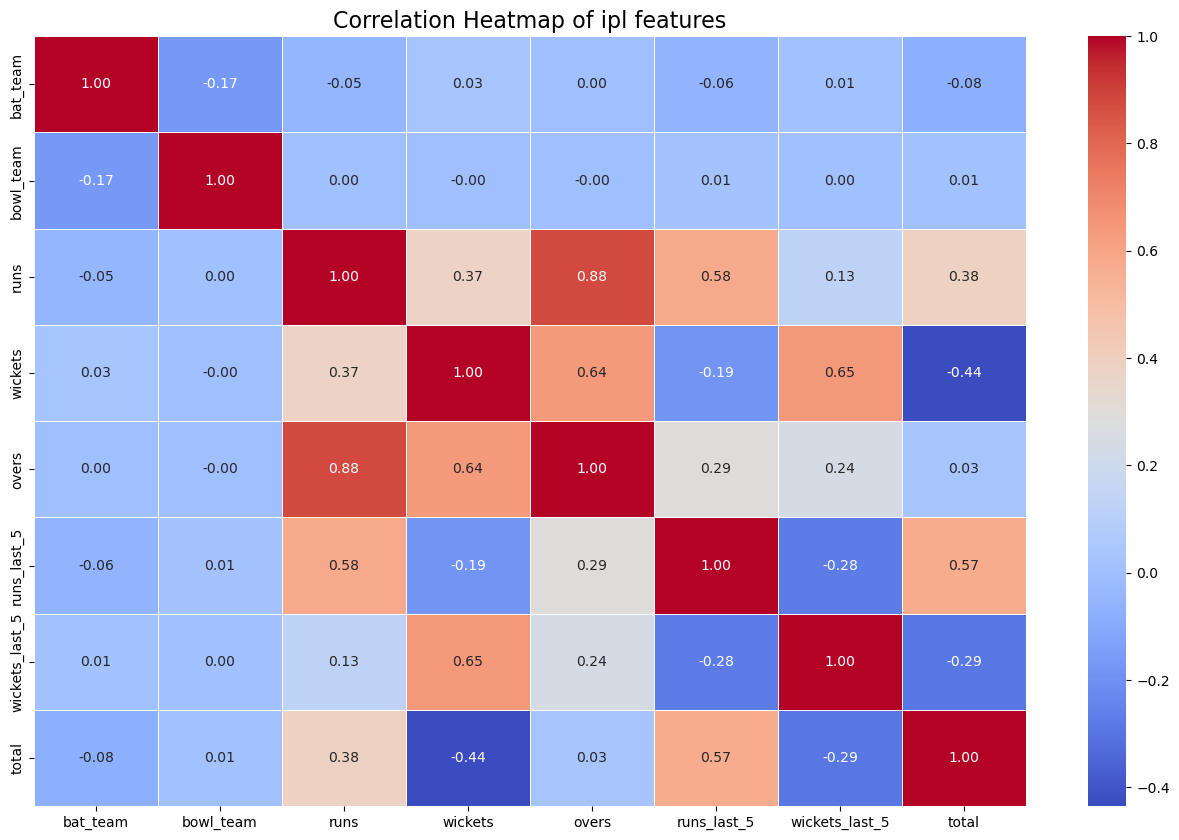

In [33]:
df_corr=df_encoded.drop(columns=['date'])

# Compute correlation matrix
corr_matrix=df_corr.corr()
# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap of ipl features',fontsize=16)
plt.show()

In [34]:
df_encoded['year']=pd.to_datetime(df_encoded['date']).dt.year
df_encoded

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
0,2008-04-18,2,5,61,0,5.1,59,0,222,2008
1,2008-04-18,2,5,61,1,5.2,59,1,222,2008
2,2008-04-18,2,5,61,1,5.3,59,1,222,2008
3,2008-04-18,2,5,61,1,5.4,59,1,222,2008
4,2008-04-18,2,5,61,1,5.5,58,1,222,2008
...,...,...,...,...,...,...,...,...,...,...
29457,2017-05-19,2,3,106,9,18.1,29,4,107,2017
29458,2017-05-19,2,3,107,9,18.2,29,4,107,2017
29459,2017-05-19,2,3,107,9,18.3,28,4,107,2017
29460,2017-05-19,2,3,107,9,18.4,24,4,107,2017


In [35]:
# Training set: Seasons 1–9 (2008–2016)
train_df=df_encoded[df_encoded['year']<2017]

# Test set: Season 10 (2017)
test_df=df_encoded[df_encoded['year']==2017]

In [36]:
train_df.shape

(27604, 10)

In [37]:
test_df.shape

(1858, 10)

#### Training and Testing Sets

In [38]:
x_train=train_df.drop(columns=['total','date','year'])
y_train=train_df['total']

x_test=test_df.drop(columns=['total','date','year'])
y_test=test_df['total']

# Align the features in case some columns are missing in test
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

In [39]:
x_train.shape

(27604, 7)

In [40]:
x_test.shape

(1858, 7)

In [41]:
y_train.shape

(27604,)

In [42]:
y_test.shape

(1858,)

### Linear Regeression

In [56]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [57]:
from sklearn.metrics import  r2_score, mean_squared_error

In [58]:
y_lr_pred=lr_model.predict(x_test)

In [59]:
r2_lr=r2_score(y_test,y_lr_pred)

mse_lr=mean_squared_error(y_test,y_lr_pred)

rmse_lr=np.sqrt(mse_lr)

print("Model Evaluation Metrics:")
print(f"R2 Score: {r2_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Sqaured Errror: {rmse_lr:.4f}")

Model Evaluation Metrics:
R2 Score: 0.7603
Mean Squared Error (MSE): 212.2154
Root Mean Sqaured Errror: 14.5676


### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(random_state=1)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [61]:
y_dt_pred=dt_model.predict(x_test)

In [62]:
r2_dt=r2_score(y_test,y_dt_pred)

mse_dt=mean_squared_error(y_test,y_dt_pred)

rmse_dt=np.sqrt(mse_dt)

print("Model Evaluation Metrics")
print(f"R2 Score: {r2_dt:.4f}")
print(f"Mean Squared Error(MSE): {mse_dt:.4f}")
print(f"Root Mean Sqaured Error(RMSE): {rmse_dt:.4f}")

Model Evaluation Metrics
R2 Score: 0.4367
Mean Squared Error(MSE): 498.6507
Root Mean Sqaured Error(RMSE): 22.3305


###	Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [64]:
y_rf_pred=rf_model.predict(x_test)

In [65]:
r2_rf=r2_score(y_test,y_rf_pred)
mse_rf=mean_squared_error(y_test,y_rf_pred)
rmse_rf=np.sqrt(mse_rf)
print("Model Evaluation Metrics")
print(f"R2 Score: {r2_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Sqaured Error (RMSE): {rmse_rf:.4f}")

Model Evaluation Metrics
R2 Score: 0.6479
Mean Squared Error (MSE): 311.6948
Root Mean Sqaured Error (RMSE): 17.6549


### ADA Booster Regression on Linear Regression

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
ada_model=AdaBoostRegressor(estimator=LinearRegression(),n_estimators=100,random_state=21)
ada_model.fit(x_train,y_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100,
                  random_state=21)

In [67]:
y_ada_pred=ada_model.predict(x_test)

In [68]:
r2_ada=r2_score(y_test,y_ada_pred)
mse_ada=mean_squared_error(y_test,y_ada_pred)
rmse_ada=np.sqrt(mse_ada)

print("Model Evaluation Metrics")
print(f"R2 Score: {r2_ada:.4f}")
print(f"Mean Sqaured Error (MSE): {mse_ada:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ada:.4f}")

Model Evaluation Metrics
R2 Score: 0.7590
Mean Sqaured Error (MSE): 213.3819
Root Mean Squared Error (RMSE): 14.6076


###  Example Predictions

####  1.	Kolkata Knight Riders vs. Delhi Daredevils (2018, Match 13)

In [69]:
from datetime import datetime
match_input=pd.DataFrame({'date':[datetime(2018,4,16)],  # Match 13 2018
                          'bat_team': ['Kolkata Knight Riders'],
                          'bowl_team':['Delhi Daredevils'],'runs':[104],'wickets':[2],'overs':[8.2],
                          'runs_last_5':[60],'wickets_last_5':[1]})
cate_cols=['bat_team','bowl_team']
match_encoded=match_input.copy()
for col in cate_cols:
    match_encoded[col]=le.fit_transform(match_encoded[col])
match_encoded.head(2)

missing_cols=set(x_train.columns)-set(match_encoded.columns)
for col1 in missing_cols:
    match_encoded[col1]=0


# Reorder columns to match training data
match_encoded=match_encoded[x_train.columns]


# Predict using best model (e.g., ADA Booster)
predicted_score=ada_model.predict(match_encoded)[0]


# Show predicted total score (rounding off)
print(f" Predicted Score: {int(predicted_score)}/9 (example wickets)")


 Predicted Score: 200/9 (example wickets)


###  2.	Sunrisers Hyderabad vs. RoyalChallengers Bangalore (2018, Match 39)

In [70]:
match_input1=pd.DataFrame({'date':[datetime(2018,5,7)],    # Match 39 2018
                           'bat_team':['Sunrisers Hydrabad'],
                           'bowl_team':['Royal Challengers Banglore'],
                           'runs':[66],'wickets':[3],'overs':[10.5],'runs_last_5':[40],'wickets_last_5':[1]
                          })
# One-hot encode
cat_cols1=['bat_team','bowl_team']
match_encoded1=match_input1.copy()
for col2 in cat_cols1:
    match_encoded1[col2]=le.fit_transform(match_encoded1[col2])

missing_cols1=set(x_train.columns)-set(match_encoded1.columns)
for cols3 in missing_cols1:
    match_encoded1[cols3]=0

# Reorder columns to match training data
match_encoded1=match_encoded1[x_train.columns]

# Predict using best model (e.g., Linear Regresion)
predicted_score1=lr_model.predict(match_encoded1)[0]


# Show predicted total score (rounding off)
print(f" Predicted score:{int(predicted_score1)}/10")

 Predicted score:146/10


#### 3.	Mumbai Indians vs. Kings XI Punjab (2019, Match 59 - Eliminator)

In [71]:
match_input2=pd.DataFrame({ 'date':[datetime(2019,5,8)] ,    # Match 59 2019 Eliminator 
               'bat_team':['Mumbai Indians'],
               'bowl_team':['Kings XI Punjab'],
               'runs':[80],'wickets':[1],'overs':[7.5],'runs_last_5':[55],'wickets_last_5':[3]
              })
# One hot encoding
cat_cols2=['bat_team','bowl_team']
match_encoded2=match_input2.copy()
for col3 in cat_cols2:
  match_encoded2[col3]=le.fit_transform(match_encoded2[col3])


# Add any missing columns (compared to X_train)
missing_cols2=set(x_train.columns)-set(match_encoded2.columns)
for cols4 in missing_cols2:
    match_encoded2[cols4]
# Reorder columns to match training data
match_encoded2=match_encoded2[x_train.columns]

# Predict using best model (e.g., Linear Regresion)
predicted_score2=lr_model.predict(match_encoded2)[0]

# Show prdicted score (Rounding off)
print(f" Predicted Score :{int(predicted_score2)}/8")


 Predicted Score :186/8


In [ ]:
df_encoded.columns

#### 4.	Rajasthan Royals vs. Chennai Super Kings (2019, Match 25)

In [72]:
match_input3=pd.DataFrame({'date':[datetime(2019,4,11)],   # Match 25 2019
                           'bat_team':['Rajastan Royals'],
                           'bowl_team':['Cheenai Super Kings'],
                           'runs':[63],'wickets':[2],'overs':[9.4],'runs_last_5':[37],'wickets_last_5':[5]
                          })
cat_cols4=['bat_team','bowl_team']
match_encoded3=match_input3.copy()
for col4 in cat_cols4:
    match_encoded3[col4]=le.fit_transform(match_encoded3[col4])

missing_cols3=set(x_train.columns)-set(match_encoded3.columns)
for cols5 in missing_cols3:
    match_encoded3[cols5]

match_encoded3=match_encoded3[x_train.columns]

predicted_score3=ada_model.predict(match_encoded3)

print(f" Predicted Score : {int(predicted_score3)}/7")

 Predicted Score : 151/7


### Model Improvement by using Grid SearchCV for future 

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf':[1,2]
}

grid_rf= GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [75]:
best_model = grid_rf.best_estimator_
print(" Best parameters:", grid_rf.best_params_)
print("Best R2 Score:", grid_rf.best_score_)

 Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 Score: 0.48863687673314954


### XGBoost 

In [76]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

ModuleNotFoundError: No module named 'xgboost'